구글드라이브연결

In [4]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/gdrive', force_remount = False)

Mounted at /content/gdrive


라이브러리 임포트

In [5]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

os.listdir()

['.config', 'adc.json', 'gdrive', 'sample_data']

이미지데이터 불러오기, 같은크기로 만들기

In [6]:
# 기본 경로
base_dir = '/content/gdrive/My Drive/PetImages'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'Cat')
train_dogs_dir = os.path.join(train_dir, 'Dog')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'Cat')
validation_dogs_dir = os.path.join(validation_dir, 'Dog')
print(validation_cats_dir)
print(validation_dogs_dir)

/content/gdrive/My Drive/PetImages/train/Cat
/content/gdrive/My Drive/PetImages/train/Dog
/content/gdrive/My Drive/PetImages/validation/Cat
/content/gdrive/My Drive/PetImages/validation/Dog


In [9]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

['9079.jpg', '9097.jpg', '9081.jpg', '9089.jpg', '9111.jpg']
['9105.jpg', '9114.jpg', '9099.jpg', '9120.jpg', '91.jpg']
total training cat images: 12501
total training dog images: 12505
total validation cat images: 12501
total validation dog images: 12501


check img

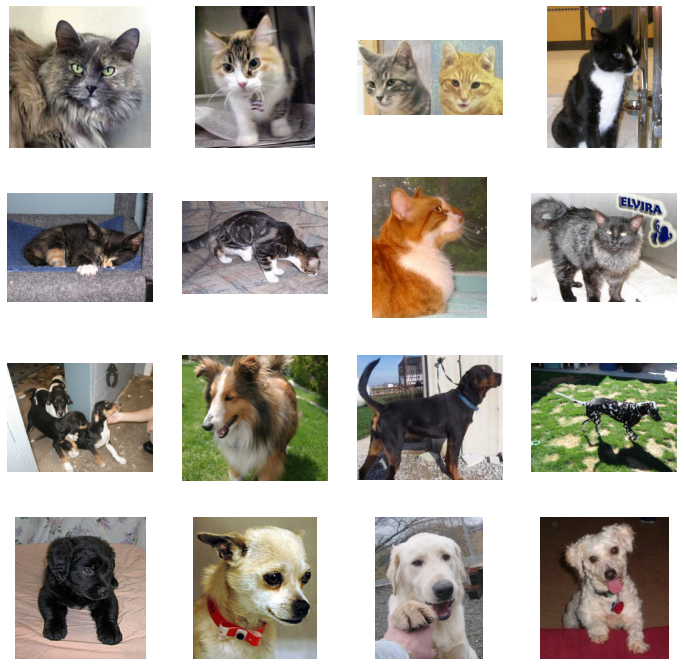

In [10]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

모델구성

In [11]:
from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(150,150,3))

x = layers.Conv2D(16,3,activation = 'relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32,3,activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64,3,activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)       

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

이미지처리

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255.)
test_datagen = ImageDataGenerator( rescale = 1.0/255.)

#변형 이미지
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True)

#데이터 읽기
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 25004 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


In [18]:
#learning
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  
      verbose=2)

Epoch 1/15


UnknownError: ignored

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")